# 07 - Two-Sample CI and HT

#### Objectives: Confidence interval and significance tests for two samples.

## Food Intake and Weight Gain

If we increase our food intake, we generally gain weight. Nutrition scientists can calculate the amount of weight gain that would be associated with a given increase in calories. 

![](http://www.vizz.co/wp-content/uploads/2014/12/weight-gain-apps.jpg) _"http://www.vizz.co/free-weight-gain-apps-slim-people-gain-weight/"_

In one study, 16 non-obese adults, aged 25 to 36 years, were fed 1000 calories per day in excess of the calories needed to maintain a stable body weight. The subjects maintained this diet for 8 weeks, so they consumed a total of 56,000 extra calories. According to theory, 3500 extra calories will translate into a weight gain of 1 pound. Therefore, we expect each of these subjects to gain 56,000/3500 = 16 pounds (lb). Here are the weights before and after the 8-week period expressed in kilograms (kg):

[Purdue lab 07](http://www.stat.purdue.edu/~jtroisi/STAT350Spring2015/labs/lab6/lab6SASKEY.pdf)

> Should you use two sample t or matched pairs t procedure to analyze the data?
Please explain your answer without referring to the format of the data.


this sould be a __matched pairs t procedure__ because we are looking to compare a the before and after of the subjects involved in the test and we only have one populaiton that was measured twice. 

In [1]:
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt 
%matplotlib inline
from matplotlib import style
import statsmodels.api as sm #QQ plot

In [2]:
weight = pd.read_table("./data/weightgain.txt")
weight.describe()

,id,wtb,wta
count,16.000000,16.000000,16.000000
mean,8.500000,65.743750,70.475000
std,4.760952,10.320398,9.744571
min,1.000000,53.300000,58.800000
25%,4.750000,57.325000,62.675000
50%,8.500000,62.850000,67.200000
75%,12.250000,73.400000,77.425000
max,16.000000,91.700000,93.100000


### Normality 
> Do you think these data are Normally distributed? Use graphical methods to
examine the appropriate distribution. Write a short summary of your findings.

In [24]:
def plot_hist(data, mean=0, std=1, num_bins = 50):

    fig, ax = plt.subplots(figsize=(15,8))

    # the histogram of the data
    n, bins, patches = ax.hist(data, num_bins, density=1)

    # add a 'best fit' line
    y = ((1 / (np.sqrt(2 * np.pi) * std)) *
         np.exp(-0.5 * (1 / std * (bins - mean))**2))
    ax.plot(bins, y, '--')
    #ax.set_xlabel('Smarts')
    #ax.set_ylabel('Probability density')
    #ax.set_title(r'Histogram of pig Weights: $\mu={}$, $\sigma={}$'.format(mu, sigma))

    # Tweak spacing to prevent clipping of ylabel
    fig.tight_layout()
    plt.show()

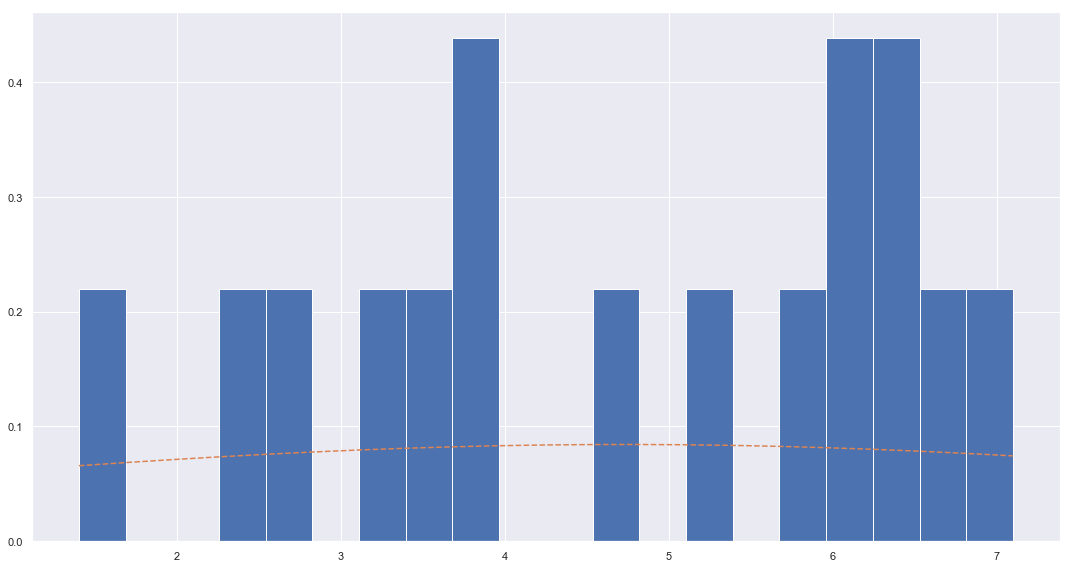

In [43]:
gain = weight.wta - weight.wtb
mu = np.mean(gain)
sigma = np.mean(gain)

# Plot Distributions
plot_hist(gain, mean = mu, std = sigma, num_bins= 20)


Histogram appears to be left skew (minor), however, appears approx normal.  __Assumption met__

{'whiskers': [<matplotlib.lines.Line2D at 0x1c5f3071710>,
 'caps': [<matplotlib.lines.Line2D at 0x1c5f306b390>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c5f3071e10>],
 'medians': [<matplotlib.lines.Line2D at 0x1c5f306bc50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c5f306bd68>],
 'means': []}

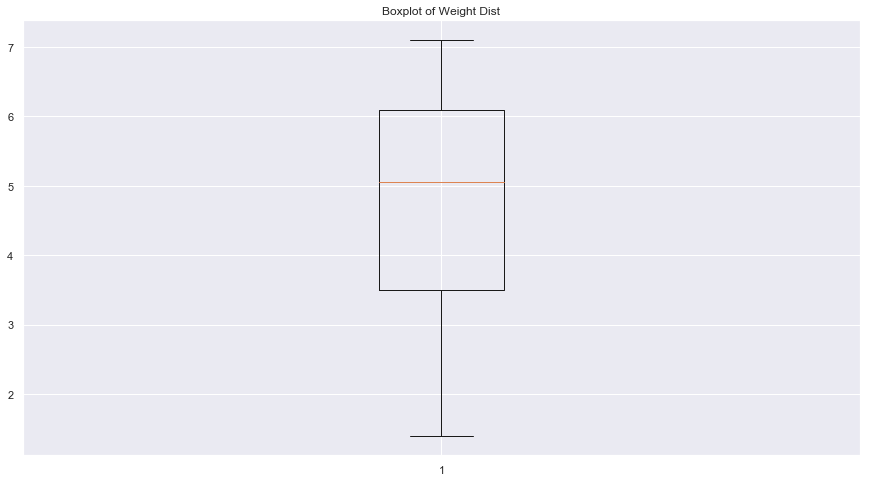

In [46]:
fig = plt.figure(figsize=(15,8))
plt.title('Boxplot of Weight Dist')
plt.boxplot(gain)

Boxplot appears approx symetrical and normal. __Assumption met__

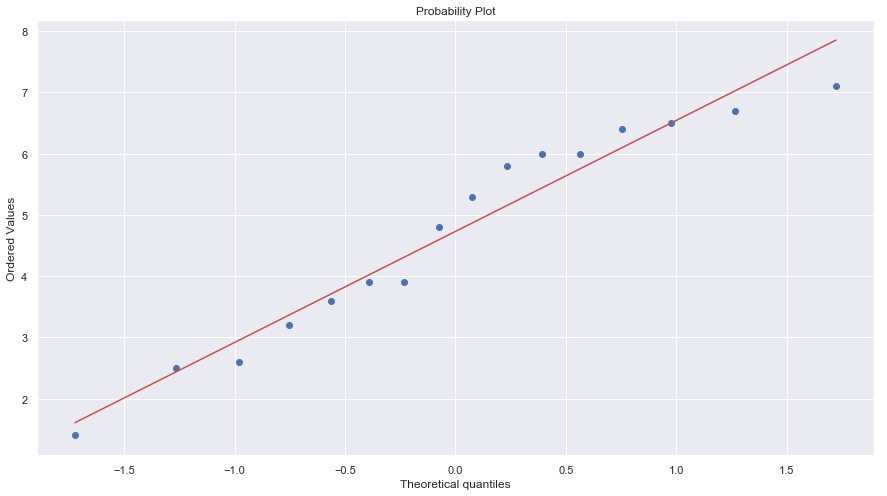

In [47]:
fig = plt.figure(figsize=(15,8))
import scipy.stats as stats
stats.probplot(gain, plot=plt)
plt.show()

The observations on the QQ plot appear to follow the linear line,  __Assumption met__

__Therefore I would conclude that the distribution is roughly normal. I would conclude that with a sample size of 16, this distribution is normal enough to perform the t-test.__

### Hypothesis Testing
> Test the null hypothesis that the mean weight gain is 16 lb. (Hint: first convert
pounds to kg. Because there are 2.2 pounds per kg, you will need to divide the mean
weight gain in pounds by 2.2 to obtain the weight in kg.) Be sure to specify the null and
alternative hypotheses, the test statistic with degrees of freedom, and the P-value. What
do you conclude?

>  Find the 95% confidence interval of the weight gain and interpret your result.


Ho = u = 7.2575
Ho = u != 7.2575

In [95]:
# t test
def interpret(p_value, alpha_level=0.05):
    if p_value > alpha_level:
        print('Same distribution (fail to reject H0)')
    else:
        print('Different distribution (reject H0)')

# required statistics
n = len(gain)
alpha = 0.05
df_ =  n - 1
mu = np.mean(gain)
sigma = np.std(gain)
null_ =  7.273 # conversion of 16 lbs to kg
        
# confidence internval
se = sigma / np.sqrt(n)
t_star = stats.t.ppf(1.0 - alpha, df_)

ci_low = mu - (t_star * se)
ci_high = mu + (t_star * se)
    
        
# compare samples 
stat, p = stats.ttest_1samp(gain, null_)
print('Statistics=%.3f, p=%.4f' % (stat, p))
interpret(p, alpha)
print("Confidence Interval from: %.3f to %.3f" % (ci_low, ci_high))

Statistics=-5.824, p=0.0000
Different distribution (reject H0)
Confidence Interval from: 3.990 to 5.472


We are 95% confidence that the population mean weight gain is between 3.8010 and 5.6615 kg. The data provides strong evidence (p-vale < 0.0001) to the claim that the population mean of weight gain is different from 2.2 kg (7.273)